# Análisis de Siniestros Viales en Guadalajara y Zapopan (2019–2025)
## Notebook 03: Análisis Geoespacial

En este notebook analizamos la distribución geográfica de los accidentes de tránsito registrados en Guadalajara y Zapopan entre 2019 y 2025.

Utilizaremos herramientas como `geopandas` y `folium` para visualizar los puntos en el mapa, identificar concentraciones de siniestros y observar si existe alguna correlación espacial con la gravedad del accidente.

Este análisis permite ubicar zonas críticas que podrían beneficiarse de acciones como rediseño vial, mejor señalización o campañas de prevención.


---

## Carga de datos geoespaciales

En esta sección cargamos el archivo `accidentes_shapes.geojson`, que contiene los registros de siniestros viales ya procesados y listos para análisis geográfico.

Este archivo incluye coordenadas, atributos del accidente, y una columna de geometría en formato punto.


In [3]:
import geopandas as gpd

# Cargar directamente desde el GeoJSON limpio
gdf = gpd.read_file("../data/accidentes_shapes.geojson")


## Mapa estático de accidentes

Este mapa muestra la ubicación de todos los siniestros registrados. Se aprecia una alta concentración en zonas urbanas y corredores viales de alta movilidad, especialmente dentro del municipio de Guadalajara.


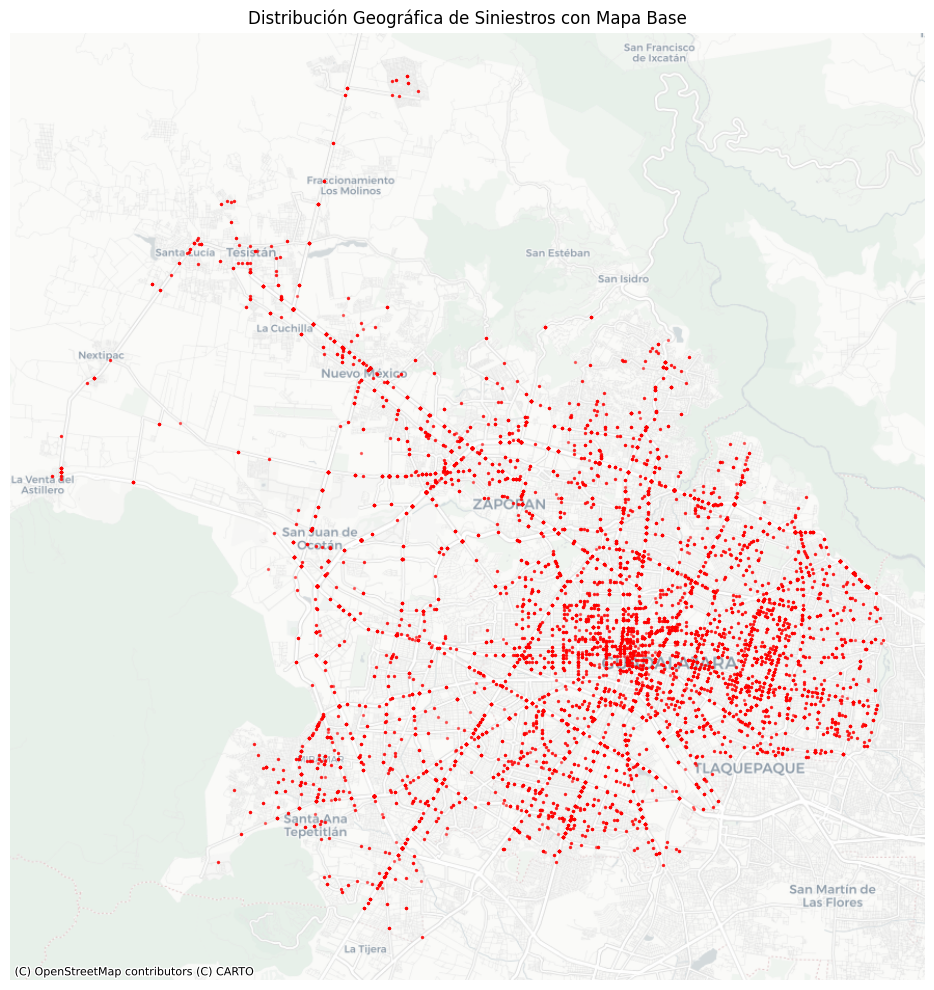

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convertir CRS de WGS84 a Web Mercator (necesario para usar contextily)
gdf_web = gdf.to_crs(epsg=3857)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar puntos
gdf_web.plot(ax=ax, markersize=2, alpha=0.5, color="red")

# Agregar mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Quitar ejes y añadir título
ax.set_title("Distribución Geográfica de Siniestros con Mapa Base")
ax.axis("off")

plt.savefig("../outputs/mapa_estatico_accidentes.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()



---

## Mapa de calor interactivo

Este mapa muestra una visualización interactiva de las zonas con mayor concentración de accidentes viales. Cada punto del heatmap representa un siniestro, y las zonas más cálidas indican mayor densidad.

Este tipo de visualización es especialmente útil para exploración y presentación a tomadores de decisiones, ya que permite identificar de forma inmediata las áreas prioritarias para intervención.


In [7]:
import folium
from folium.plugins import HeatMap

# Obtener centro del mapa
centro = [gdf.geometry.y.mean(), gdf.geometry.x.mean()]

# Crear mapa base con estilo claro
m = folium.Map(location=centro, zoom_start=12, tiles="CartoDB positron")

# Crear lista de coordenadas para el heatmap
heat_data = [[point.y, point.x] for point in gdf.geometry if point is not None]

# Añadir capa de calor
HeatMap(heat_data, radius=9).add_to(m)

# Guardar como HTML
m.save("../outputs/mapa_calor_accidentes.html")

---

## Mapa interactivo de accidentes fatales

En este mapa se visualizan únicamente los siniestros que resultaron en al menos una persona fallecida. Cada punto negro representa un fallecimiento asociado a un accidente vial.

Esta visualización permite observar si existen patrones geográficos para los casos más graves, y ayuda a identificar zonas que requieren intervención urgente o mayor vigilancia.


In [9]:
# Filtrar siniestros con al menos un fallecido
fallecidos = gdf[gdf["consecuencia"].str.lower() == "fallecido"]

# Crear mapa centrado en el área promedio
centro = [fallecidos.geometry.y.mean(), fallecidos.geometry.x.mean()]
m_fallecidos = folium.Map(location=centro, zoom_start=12, tiles="CartoDB positron")

# Añadir marcador para cada fallecimiento
for _, row in fallecidos.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color="black",
        fill=True,
        fill_opacity=0.9,
        popup=f"{row['fecha']} - {row['tipo_siniestro']}"
    ).add_to(m_fallecidos)

# Guardar mapa como HTML
m_fallecidos.save("../outputs/mapa_fallecidos.html")

---

## Conclusiones del Análisis Geoespacial

El análisis espacial de los siniestros viales permite visualizar de manera clara la distribución de los accidentes a lo largo del área metropolitana de Guadalajara. Se observaron varios patrones clave:

- La concentración de accidentes se alinea fuertemente con zonas densamente pobladas, ejes viales principales y centros de actividad urbana.
- El mapa de calor reveló zonas críticas con alta densidad de accidentes que coinciden con puntos de congestión o vías de alta velocidad.
- La distribución de los siniestros con víctimas fatales mostró áreas particularmente vulnerables, tanto en el centro como en zonas periféricas, indicando la necesidad de atención diferenciada según el contexto urbano.

Estos hallazgos visuales sientan una base sólida para aplicar técnicas de clustering en el siguiente paso del proyecto, con el fin de delimitar con precisión zonas de intervención prioritaria.
